# Unsupervised K-Means Clustering
### Is position the natural division of labor on an NBA basketball team?

## Background
There are five players on a basketball team - two guards, two forwards and a centre. However, there is also a school of thought that posits this division of labour is incorrect, and a better division is one guard, two wings, and two forwards.

I thought it would be interesting to cluster the players in an NBA season to see which division is correct. The results were not quite as expected.

### Loading Neccessary Packages

First, we load the packages that are not native to Python but that we need to process the data. They are:
1. `Pandas`, a package that allows scaler calculations on matrix-type data.
2. `Matplotlib`, the leading graphing utilty in the Python ecosystem.
3. `KMeans`, part of the sklearn machine learning suite. This is the object we'll use to do the calculations.
4. `MinMaxScaler`, also part of the sklearn suite. It allows us to normalise the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### The Data
Provided by <a href="http://www.sports-reference.com/sharing.html?utm_source=direct&utm_medium=Share&utm_campaign=ShareTool">Basketball-Reference.com</a>: <a href="http://www.basketball-reference.com/leagues/NBA_2016_per_game.html?sr&utm_source=direct&utm_medium=Share&utm_campaign=ShareTool#per_game_stats">View Original Table</a><br>Generated 11/2/2016.


In [3]:
bb_reference = pd.read_csv('nba_2015_2016.csv')

old_positions = {"PG": 'guard',
                 "SG": 'guard',
                 "SF": 'forward',
                 "PF": 'forward',
                 "C": 'center',
                 "PF-C": 'forward',
                 "SG-PG": 'guard',
                 "SG-SF": 'guard'}

new_positions = {"PG": 'guard',
                 "SG": 'wing',
                 "SF": 'wing',
                 "PF": 'forward',
                 "C": 'forward',
                 "PF-C": 'forward',
                 "SG-PG": 'wing',
                 "SG-SF": 'wing'}


bb_reference['OP'] = bb_reference['Pos'].map(old_positions)
bb_reference['NP'] = bb_reference['Pos'].map(new_positions)


print bb_reference.head()

   Rk         Player Pos  Age   Tm   G  GS    MP   FG   FGA   ...     DRB  \
0   1     Quincy Acy  PF   25  SAC  59  29  14.8  2.0   3.6   ...     2.1   
1   2   Jordan Adams  SG   21  MEM   2   0   7.5  1.0   3.0   ...     1.0   
2   3   Steven Adams   C   22  OKC  80  80  25.2  3.3   5.3   ...     3.9   
3   4  Arron Afflalo  SG   30  NYK  71  57  33.4  5.0  11.3   ...     3.4   
4   5  Alexis Ajinca   C   27  NOP  59  17  14.6  2.5   5.3   ...     3.3   

   TRB  AST  STL  BLK  TOV   PF  PS/G       OP       NP  
0  3.2  0.5  0.5  0.4  0.5  1.7   5.2  forward  forward  
1  1.0  1.5  1.5  0.0  1.0  1.0   3.5    guard     wing  
2  6.7  0.8  0.5  1.1  1.1  2.8   8.0   center  forward  
3  3.7  2.0  0.4  0.1  1.2  2.0  12.8    guard     wing  
4  4.6  0.5  0.3  0.6  0.9  2.3   6.0   center  forward  

[5 rows x 32 columns]


Let's look at the data a little more closely.

#### The Breakdown of Guards, Forwards and Centers

In [4]:
bb_reference.OP.value_counts()

guard      247
forward    229
center     102
Name: OP, dtype: int64

#### The Breakdown of Guards, Wings and Forwards

In [5]:
bb_reference.NP.value_counts()

wing       226
forward    223
guard      129
Name: NP, dtype: int64

#### The Breakdown of Minutes Played Per Player, Per Game

count    578.000000
mean      19.392907
std        9.231705
min        1.200000
25%       12.025000
50%       18.800000
75%       27.175000
max       42.000000
Name: MP, dtype: float64


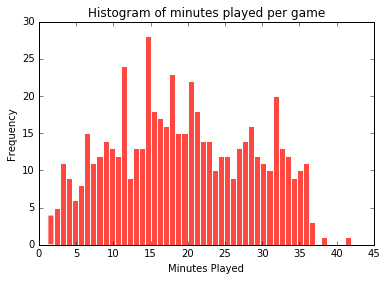

In [8]:
print bb_reference.MP.describe()

bb_reference.MP.plot(kind = 'hist', bins = 50, color = '#FF4841', edgecolor = 'white')
plt.xlabel('Minutes Played')
plt.title('Histogram of minutes played per game');

#### Creating K-Means and Scaler Objects

Now, we create the kmeans and scaler objects. I've chosen three clusters here, because that's the proposition I'm trying to investigate - which three-way division of positions on a basketball team is correct? Two guards, two forwards and one centre, or one guard, two wings and two forwards?

In [9]:
kmeans = KMeans(n_clusters = 3)
scaler = MinMaxScaler()

Our scaler object can only process numerical data. Therefore, categorical data - which is not essential to the analysis anyway - has to go.

In [10]:
bb_reference = bb_reference.dropna()
bb_test = bb_reference.drop(['Rk', 'Player', 'Pos', 'Tm', 'OP', 'NP'], axis = 1).copy()


bb_scaled = scaler.fit_transform(bb_test)
type(bb_scaled)

numpy.ndarray

#### Fitting the Data
Now we fit the new, scaled data to the kmeans object. This allows us to create a list, labels_scaled, in which each player in the `bb_reference` data frame is assigned to a particular cluster, labelled 0, 1 or 2.
Note that we once we have our labels, we return to the original, non-scaled data. The scaled data is only used in the creation of the clusters and their correct labelling.

In [11]:
kmeans.fit(bb_scaled)
labels_scaled = kmeans.labels_
bb_reference['labels_scaled'] = labels_scaled
scaled_labels_checker = bb_reference.groupby(labels_scaled)

#### Grouping by Cluster
Now divide our data frame in different groups according to the groups' clusters. We'll then create two sets of three pie charts, each showing how the old positions and the new positions are divided among the clusters. The positioning system best-fitting the clusters is the correct one.

In theory.

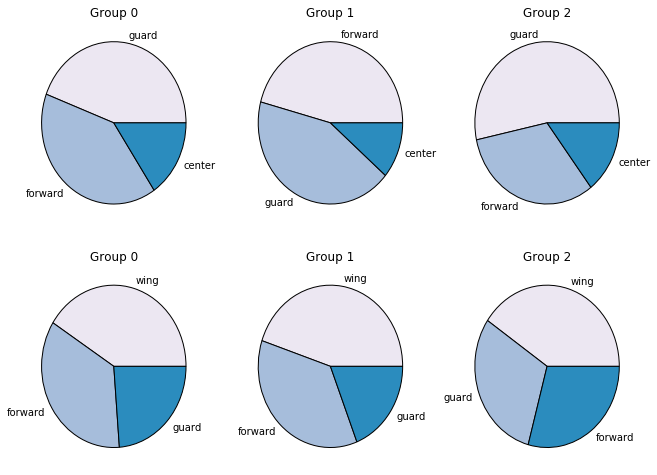

In [12]:
fig, ax = plt.subplots(2, 3, figsize = (11, 8))

colors = ['#ece7f2','#a6bddb','#2b8cbe']
gatherer = []

for label, details in scaled_labels_checker:
    positions = details.OP.value_counts()
    ax[0][label].pie(positions, colors = colors, labels = positions.index)
    ax[0][label].set_title('Group ' + str(label))
    gatherer.append(positions)
    
for label, details in scaled_labels_checker:
    positions = details.NP.value_counts()
    ax[1][label].pie(positions, colors = colors, labels = positions.index)
    ax[1][label].set_title('Group ' + str(label))
    gatherer.append(positions)

And this isn't what we expected at all. Each group should be dominated by a positon - instead, they break down relative to their occurance in the original data set. Nothing has happened!

In [13]:
old_positions = pd.concat(gatherer[:3], axis=1)
old_positions.columns = columns = [0,1,2]
old_positions

,0,1,2
center,19,23,26
forward,49,94,57
guard,54,88,95


In [14]:
new_positions = pd.concat(gatherer[3:], axis=1)
new_positions.columns = columns = [0,1,2]
new_positions

,0,1,2
forward,43,74,52
guard,29,39,54
wing,50,92,72


### But If Positions Aren't Important - What is?
And this isn't what we expected at all. But - what if the algorithm has found a truth more fundamental than positions?
Let's look at the three most important stats in basketball - points, assists and rebounds - for our three groups.

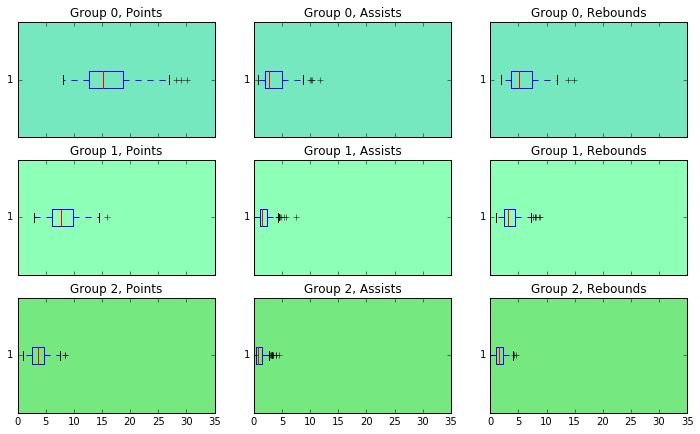

In [18]:
fig, ax = plt.subplots(3, 3, figsize = (12, 7), sharex=True)

colors = ['#75E8C0', '#8DFFB7','#75E87F']
stats = ['PS/G', 'AST', 'TRB']
names = ['Points', 'Assists', 'Rebounds']

for row in range(3):
    for col in range(3):
        data = scaled_labels_checker.get_group(row)
        box = ax[row][col].boxplot(data[stats[col]].values, vert=False)
        ax[row][col].set_title("Group " + str(row) + ', ' + names[col])
        ax[row][col].set_axis_bgcolor(colors[row])
        


### Production > Position
Look at the different distributions of data in the clusters. Group 0 is clearly better at scoring, assisting and rebounding than the other two. This suggests that the algorithm has realised that position doesn't count as much as the ability to score, to assist scoring and to gather rebounds. And a look at just who is in Group 1 may confirm our suspicions.

In [19]:
data = scaled_labels_checker.get_group(0)

data = data.sort_values('PS/G', ascending=False)
# data[['Player', 'Tm']][:20]
data[['Player', 'Tm','PS/G', 'AST', 'TRB', 'OP', 'NP']][:20]

,Player,Tm,PS/G,AST,TRB,OP,NP
116,Stephen Curry,GSW,30.1,6.7,5.4,guard,guard
205,James Harden,HOU,29.0,7.5,6.1,guard,wing
137,Kevin Durant,OKC,28.2,5.0,8.2,forward,wing
106,DeMarcus Cousins,SAC,26.9,3.3,11.5,center,forward
264,LeBron James,CLE,25.3,6.8,7.4,forward,wing
325,Damian Lillard,POR,25.1,6.8,4.0,guard,guard
118,Anthony Davis,NOP,24.3,1.9,10.3,forward,forward
126,DeMar DeRozan,TOR,23.5,4.0,4.5,guard,wing
553,Russell Westbrook,OKC,23.5,10.4,7.8,guard,guard
175,Paul George,IND,23.1,4.1,7.0,forward,wing


The algorithm has correctly identified the best players in the NBA during the 2015-'16. So while it didn't do what we thought it would do, partition by position, the algorithm positioned by something more important - a player's overall worth to his team.

#### Footnote
Whether the superstar group is Group 0, 1 or 2 is immaterial - if you run the algorithm one of the three groups will be the superstar group.